#**Training and testing a machine learning model**

##Training the model

###Importing the Dataset


In [1]:
with open('/content/kaggle.json', 'w') as f:
  f.write('{"username":"raghavendragavuji","key":"ac5ced9e5c8778a54e02d519a35834b3"}')
#incase if this throws an error use your kaggle api key, uncomment below snippet and delete this part of code
'''
with open('/content/kaggle.json', 'w') as f:
  f.write('') # <--copy the content of json file here
'''
#Or You can directly import your api json to colab

"\nwith open('/content/kaggle.json', 'w') as f:\n  f.write('') # <--copy the content of json file here\n"

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:49<00:00, 24.3MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.3MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

###Data preparation

In [6]:
train_data = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.


In [7]:
validation_data = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 5000 files belonging to 2 classes.


In [8]:
#!rm -rf dogs_vs_cats

In [9]:
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_data = train_data.map(process)
validation_data = validation_data.map(process)

###Adding layers

In [10]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

###Compiling and fitting the model

In [12]:
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [13]:
history = model.fit(train_data,epochs = 15, validation_data = validation_data)

Epoch 1/15
625/625 [==============================] - 82s 115ms/step - loss: 1.3934 - accuracy: 0.6113 - val_loss: 0.6287 - val_accuracy: 0.6922
Epoch 2/15
625/625 [==============================] - 74s 118ms/step - loss: 0.5868 - accuracy: 0.7010 - val_loss: 0.5547 - val_accuracy: 0.6988
Epoch 3/15
625/625 [==============================] - 72s 115ms/step - loss: 0.4864 - accuracy: 0.7674 - val_loss: 0.8436 - val_accuracy: 0.5826
Epoch 4/15
625/625 [==============================] - 73s 116ms/step - loss: 0.4210 - accuracy: 0.8071 - val_loss: 0.4455 - val_accuracy: 0.7856
Epoch 5/15
625/625 [==============================] - 72s 115ms/step - loss: 0.3592 - accuracy: 0.8415 - val_loss: 0.4463 - val_accuracy: 0.7968
Epoch 6/15
625/625 [==============================] - 72s 115ms/step - loss: 0.2898 - accuracy: 0.8759 - val_loss: 0.4957 - val_accuracy: 0.7882
Epoch 7/15
625/625 [==============================] - 72s 115ms/step - loss: 0.1971 - accuracy: 0.9215 - val_loss: 0.5428 - val_ac

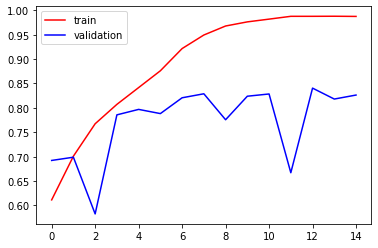

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color = 'red',label = 'train')
plt.plot(history.history['val_accuracy'],color = 'blue',label = 'validation')
plt.legend()
plt.show()

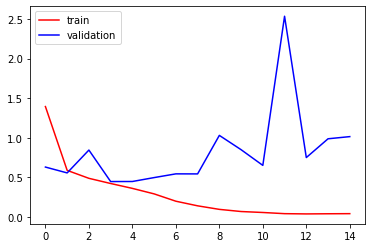

In [15]:
plt.plot(history.history['loss'],color = 'red',label = 'train')
plt.plot(history.history['val_loss'],color = 'blue',label = 'validation')
plt.legend()
plt.show()

#Testing the model

In [16]:
from keras.preprocessing import image
from keras_preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img
from matplotlib import pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [17]:
#a picture of a cat and a dog from drive
!gdown --id '1RHd8IBEqWMFRBrwZGxZY0ZlB16K_8s4Q' --output happie.jpg 
!gdown --id '1IPNC8JEAb9uuqOw9XoVqwD-R91ZHOHJu' --output chewie.jpg

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1RHd8IBEqWMFRBrwZGxZY0ZlB16K_8s4Q
To: /content/happie.jpg
100% 80.7k/80.7k [00:00<00:00, 68.2MB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1IPNC8JEAb9uuqOw9XoVqwD-R91ZHOHJu
To: /content/chewie.jpg
100% 106k/106k [00:00<00:00, 96.2MB/s]


In [18]:
test_img1 = cv2.imread('/content/happie.jpg')
test_img2 = cv2.imread('/content/chewie.jpg')

In [19]:
test_img1 = cv2.resize(test_img1,(256,256))
test_img2 = cv2.resize(test_img2,(256,256))
hori = np.concatenate((test_img1, test_img2), axis=1)

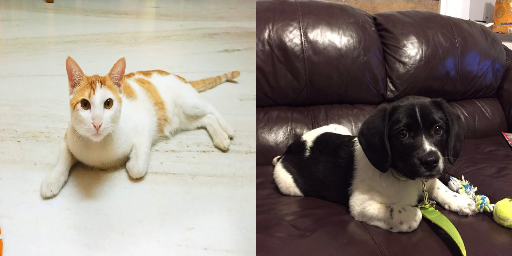

In [20]:
cv2_imshow(hori)

1/1 [==============================] - 0s 243ms/step


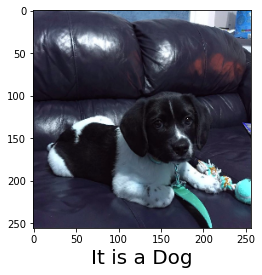

In [22]:
test_input = test_img1.reshape((1,256,256,3))

if(model.predict(test_input) > 0.5):
  plt.imshow(test_img2);
  plt.xlabel('It is a Dog',fontsize=20)
else:
  plt.imshow(test_img1);
  plt.xlabel('It is a cat',fontsize=20)

1/1 [==============================] - 0s 16ms/step


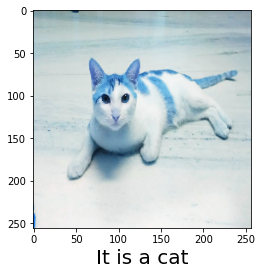

In [23]:
test_input = test_img2.reshape((1,256,256,3))
if(model.predict(test_input) > 0.5):
  plt.imshow(test_img2);
  plt.xlabel('It is a Dog',fontsize=20)
else:
  plt.imshow(test_img1);
  plt.xlabel('It is a cat',fontsize=20)

#- - - - - - - - - - THANK YOU - - - - - - - - - - -